## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from math import pi

In [2]:
data = pd.read_csv('user_profiles_for_ads.csv')
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


## Checking Null Values

In [3]:
null_values = data.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


In [4]:
column_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

## Descriptive Stats

In [5]:
descriptive_stats = data.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
            User ID  Likes and Reactions  Followed Accounts  \
count  1000.000000          1000.000000        1000.000000   
mean    500.500000          4997.084000         251.438000   
std     288.819436          2838.494365         141.941557   
min       1.000000           101.000000          10.000000   
25%     250.750000          2661.250000         126.000000   
50%     500.500000          5002.500000         245.500000   
75%     750.250000          7348.750000         377.000000   
max    1000.000000          9973.000000         498.000000   

       Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
count                      1000.000000                      1000.000000   
mean                          2.757500                         4.601600   
std                           1.279735                         2.026234   
min                           0.500000                         1.000000   
25%                           1.700000  

## Exploratory Data Analysis (EDA)

C:\Users\dambr\AppData\Local\Temp\ipykernel_8764\1186709383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age', ax=axs[0, 0], palette='viridis')
C:\Users\dambr\AppData\Local\Temp\ipykernel_8764\1186709383.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', ax=axs[0, 1], palette='viridis')
C:\Users\dambr\AppData\Local\Temp\ipykernel_8764\1186709383.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Education Level', ax=axs[1, 0], palette='viridis')
C:\Users\dambr\AppData\Local\

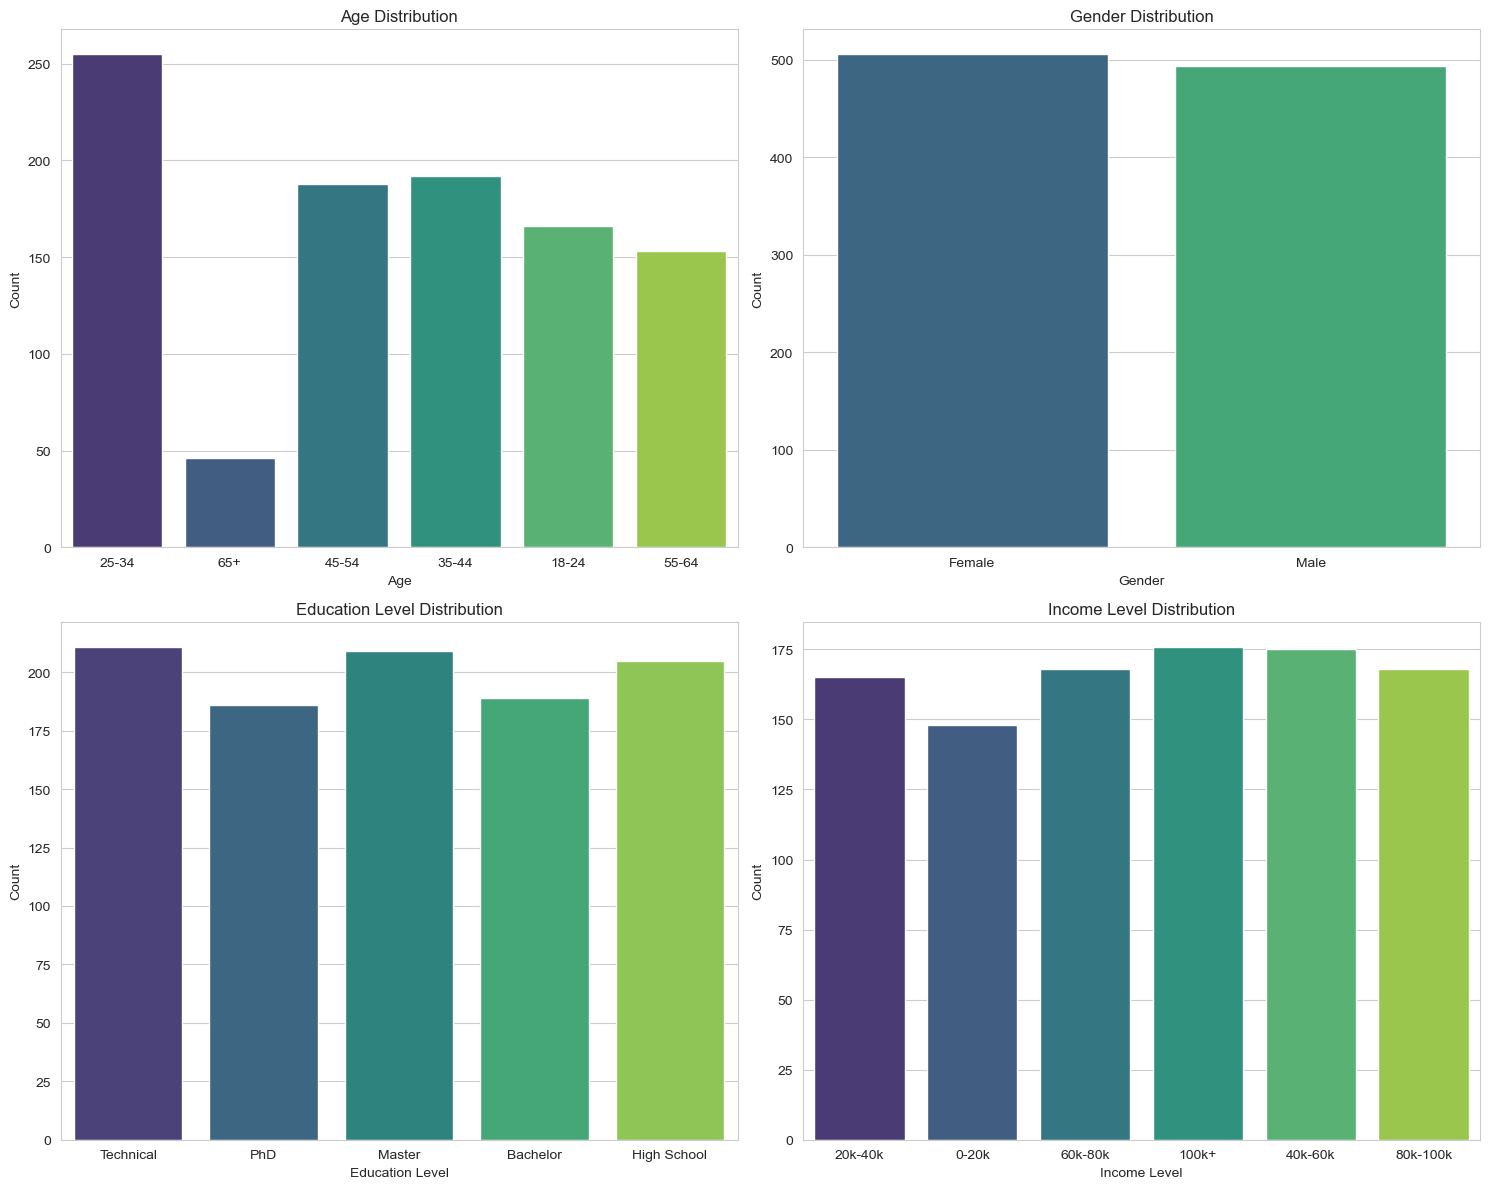

In [6]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(data=data, x='Age', ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Count')

sns.countplot(data=data, x='Gender', ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Count')

sns.countplot(data=data, x='Education Level', ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Education Level Distribution')
axs[1, 0].set_xlabel('Education Level')
axs[1, 0].set_ylabel('Count')

sns.countplot(data=data, x='Income Level', ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Income Level Distribution')
axs[1, 1].set_xlabel('Income Level')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Device Usage Patterns and Online Behavior

C:\Users\dambr\AppData\Local\Temp\ipykernel_8764\3314964733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Device Usage', ax=axs[0, 0], palette='viridis')
C:\Users\dambr\AppData\Local\Temp\ipykernel_8764\3314964733.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_interests.index, y=top_interests.values, ax=axs[1, 1], palette='viridis')


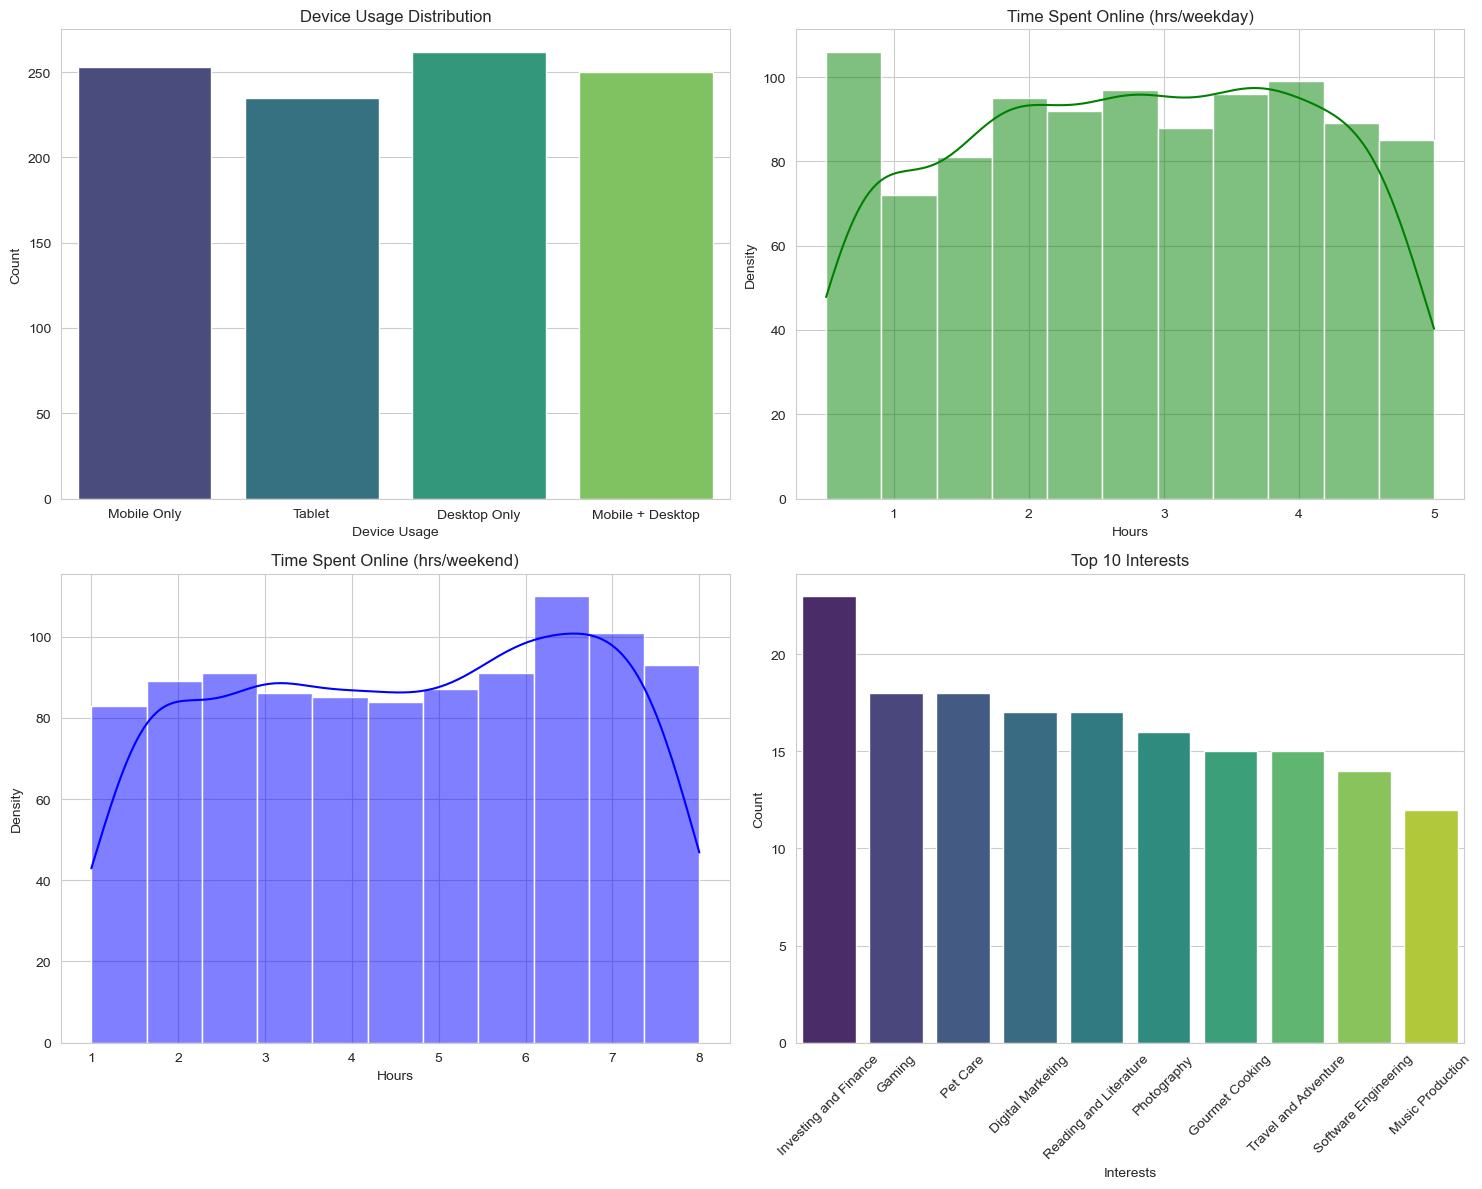

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(data=data, x='Device Usage', ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Device Usage Distribution')
axs[0, 0].set_xlabel('Device Usage')
axs[0, 0].set_ylabel('Count')

sns.histplot(data=data, x='Time Spent Online (hrs/weekday)', kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Time Spent Online (hrs/weekday)')
axs[0, 1].set_xlabel('Hours')
axs[0, 1].set_ylabel('Density')

sns.histplot(data=data, x='Time Spent Online (hrs/weekend)', kde=True, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Time Spent Online (hrs/weekend)')
axs[1, 0].set_xlabel('Hours')
axs[1, 0].set_ylabel('Density')

top_interests = data['Top Interests'].value_counts().head(10)
sns.barplot(x=top_interests.index, y=top_interests.values, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Top 10 Interests')
axs[1, 1].set_xlabel('Interests')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## User Behavior and Ad Interaction Analysis

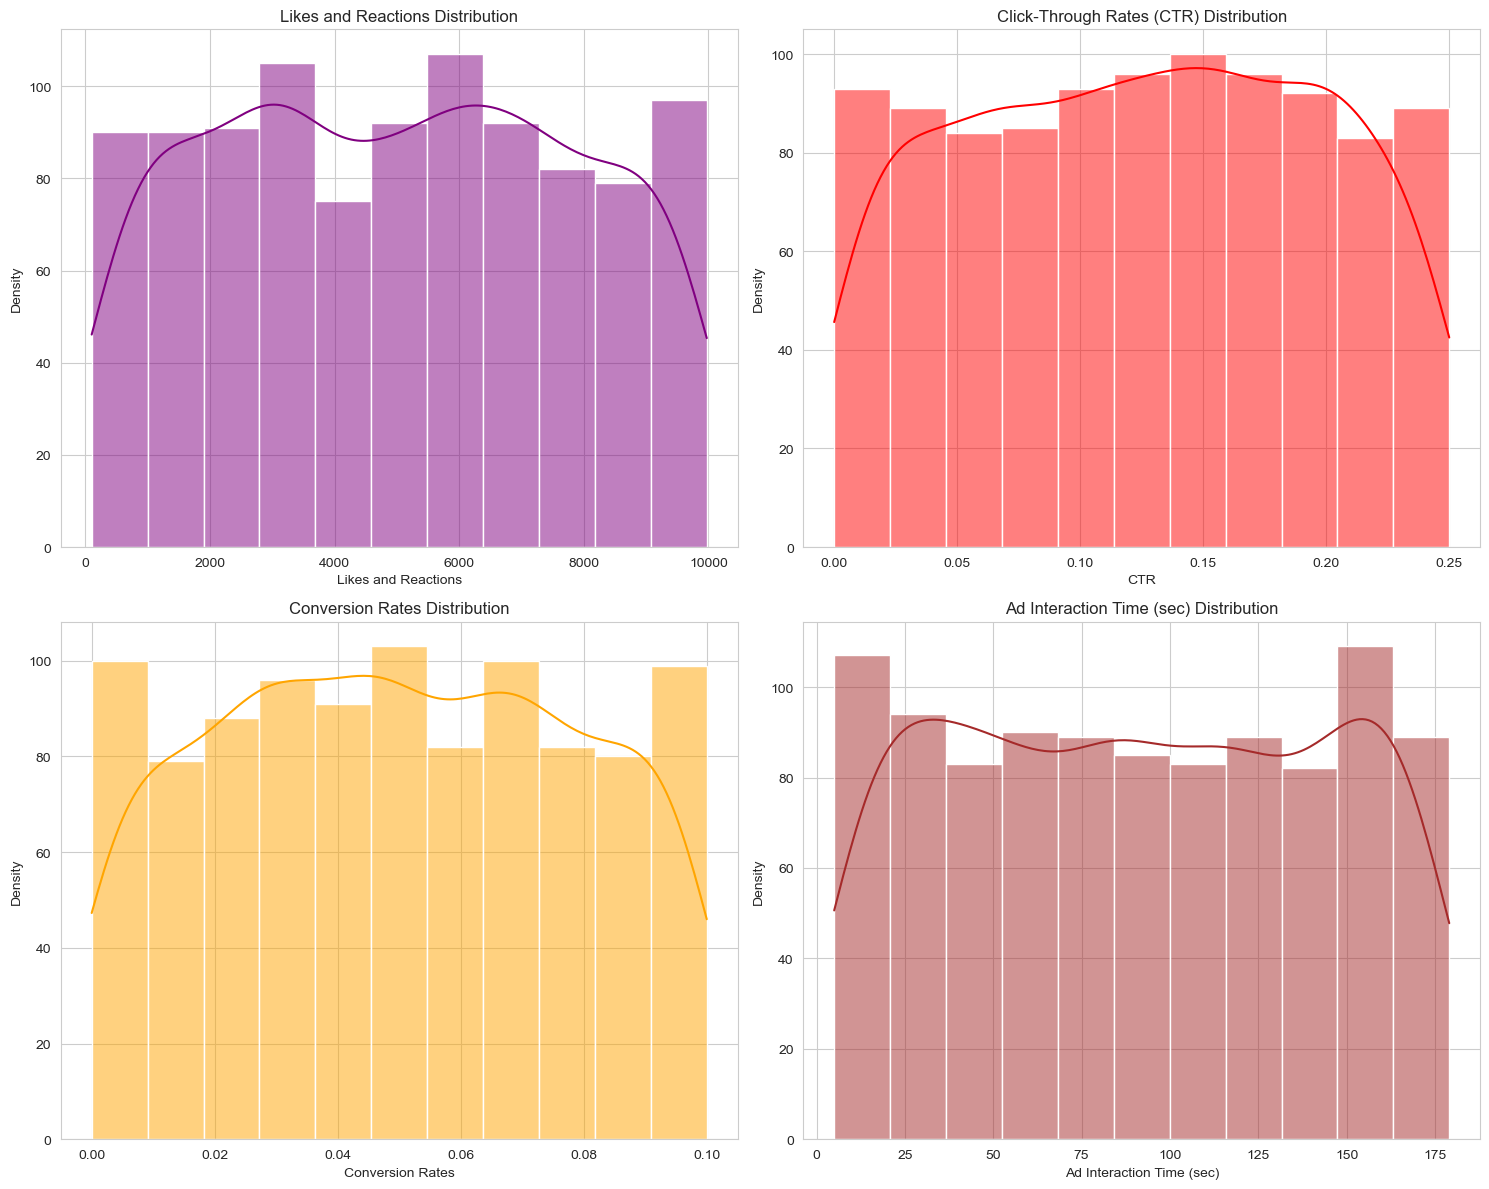

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(data=data, x='Likes and Reactions', kde=True, ax=axs[0, 0], color='purple')
axs[0, 0].set_title('Likes and Reactions Distribution')
axs[0, 0].set_xlabel('Likes and Reactions')
axs[0, 0].set_ylabel('Density')

sns.histplot(data=data, x='Click-Through Rates (CTR)', kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Click-Through Rates (CTR) Distribution')
axs[0, 1].set_xlabel('CTR')
axs[0, 1].set_ylabel('Density')

sns.histplot(data=data, x='Conversion Rates', kde=True, ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Conversion Rates Distribution')
axs[1, 0].set_xlabel('Conversion Rates')
axs[1, 0].set_ylabel('Density')

sns.histplot(data=data, x='Ad Interaction Time (sec)', kde=True, ax=axs[1, 1], color='brown')
axs[1, 1].set_title('Ad Interaction Time (sec) Distribution')
axs[1, 1].set_xlabel('Ad Interaction Time (sec)')
axs[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## User Segmentation

In [9]:
numerical_features = ['Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
                      'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates',
                      'Ad Interaction Time (sec)']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_features])
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)
cluster_means = data.groupby('Cluster')[numerical_features].mean()
categorical_features = ['Age', 'Gender', 'Education Level', 'Income Level', 'Top Interests']
cluster_modes = data.groupby('Cluster')[categorical_features].agg(lambda x: x.mode()[0])

print("Cluster Means:\n", cluster_means)
print("\nCluster Modes:\n", cluster_modes)


Cluster Means:
          Likes and Reactions  Followed Accounts  \
Cluster                                           
0                4377.420000         170.680000   
1                5528.751131         394.298643   
2                3573.112903         154.005376   
3                6438.589372         274.169082   
4                4851.392473         240.666667   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.533000                         6.084500   
1                               2.174661                         6.046606   
2                               2.504301                         4.315591   
3                               3.237681                         3.203865   
4                               2.334946                         3.131720   

         Click-Through Rates (CTR)  Conversion Rates  \
Cluster                       

## Visualization of Segments

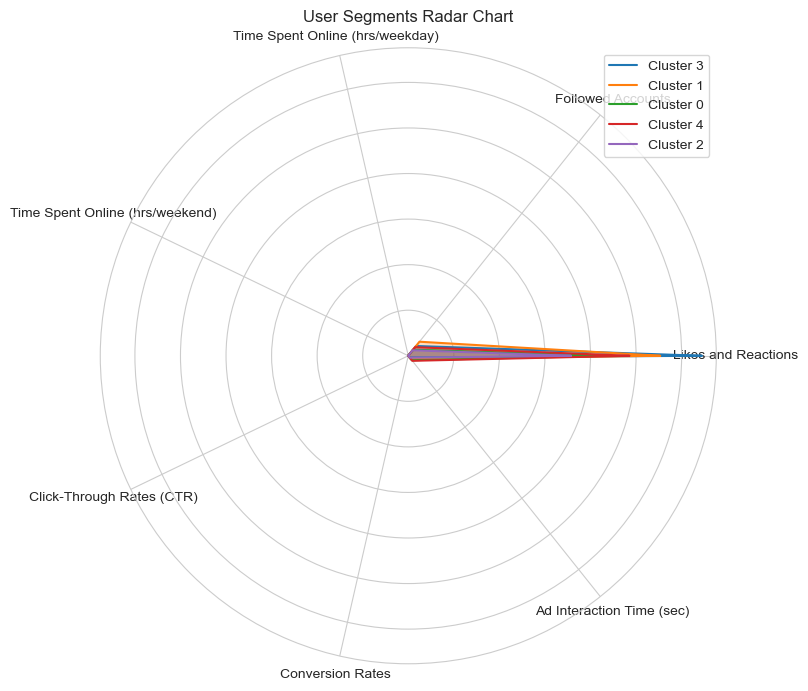

In [10]:
def create_radar_chart(data, features, title):
    num_vars = len(features)
    angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for cluster in data['Cluster'].unique():
        values = data.loc[data['Cluster'] == cluster, features].mean().tolist()
        values += values[:1]
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, label=f'Cluster {cluster}')
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    
    ax.legend()
    plt.title(title)
    plt.show()
features_to_plot = ['Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
                    'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates',
                    'Ad Interaction Time (sec)']

create_radar_chart(data, features_to_plot, 'User Segments Radar Chart')


# Summary

In [11]:
cluster_summary = data.groupby('Cluster').agg({
    'Likes and Reactions': 'mean',
    'Followed Accounts': 'mean',
    'Time Spent Online (hrs/weekday)': 'mean',
    'Time Spent Online (hrs/weekend)': 'mean',
    'Click-Through Rates (CTR)': 'mean',
    'Conversion Rates': 'mean',
    'Ad Interaction Time (sec)': 'mean',
    'Age': lambda x: x.value_counts().index[0],
    'Gender': lambda x: x.value_counts().index[0],
    'Education Level': lambda x: x.value_counts().index[0],
    'Income Level': lambda x: x.value_counts().index[0],
    'Top Interests': lambda x: x.value_counts().index[0]
})

print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
          Likes and Reactions  Followed Accounts  \
Cluster                                           
0                4377.420000         170.680000   
1                5528.751131         394.298643   
2                3573.112903         154.005376   
3                6438.589372         274.169082   
4                4851.392473         240.666667   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.533000                         6.084500   
1                               2.174661                         6.046606   
2                               2.504301                         4.315591   
3                               3.237681                         3.203865   
4                               2.334946                         3.131720   

         Click-Through Rates (CTR)  Conversion Rates  \
Cluster                     